In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import N_A

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from bremsstrahlung import tot_cs_sp_gauss, tot_cs_dp_gauss
from screening import Fermi_length
from screening import fit_More_zstar

# Style of the plot
plt.style.use('../../utils/minimal.style')

In [2]:
# Physical parameters
Z = 47
Lf = Fermi_length(Z)

In [3]:
# discretization of g1 axis
N = 100
axis_g1m1 = np.logspace(-3., 4., N)
axis_g1 = 1. + axis_g1m1

In [4]:
# Provide details on the plasma density
A = 63.546
rho = 8.96 # g/cm^3
ni = 1.e6 * N_A * rho / A # /m^3

# Provide details on the plasma temperature
Tplasma = [0., 1.e-2, 0.1, 1., 100.]

# Deduce the ionization degree
Zstar = np.array([ fit_More_zstar(Z, A, rho, T) for T in Tplasma ])
M = len(Tplasma)

In [5]:
# Compute the total cross-section
sigma_sp = np.array([tot_cs_sp_gauss(Z, g1, Lf, kmin=0., if_log=False) for g1 in axis_g1])
sigma_dp = np.zeros([M,N])
for i in range(M):
    sigma_dp[i] = np.array([tot_cs_dp_gauss(Z, g1, Tplasma[i], ni, Zstar[i], kmin=1.e-5, if_log=True) for g1 in axis_g1])

In [6]:
# Non-relativistic cross-section with Elwert correction
# We introduce on purpose the wrong term 1/beta_1 ** 2
p1 = np.sqrt(axis_g1 ** 2 - 1.)
b1 = np.sqrt(1.-(1. / axis_g1 ** 2))

sigma_sp_error = sigma_sp.copy()
sigma_sp_error[axis_g1<2] = sigma_sp_error[axis_g1<2] * (p1[axis_g1<2] / b1[axis_g1<2]) ** 2

sigma_dp_error = sigma_dp.copy()
for i in range(M):
    sigma_dp_error[i,axis_g1<2] = sigma_dp_error[i,axis_g1<2] * (p1[axis_g1<2] / b1[axis_g1<2]) ** 2

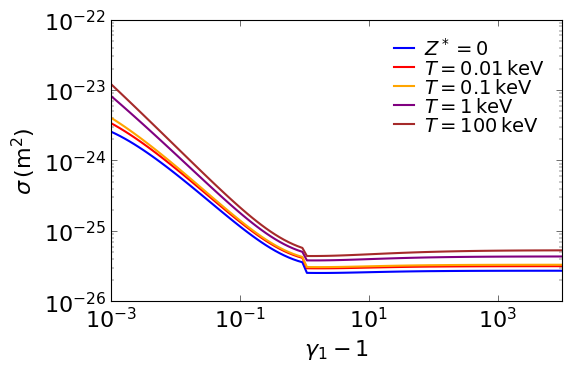

In [7]:
cc=['b','r','orange','purple', 'brown']
labels=[r"$0$", r"$0.01$", r"$0.1$", r"$1$", r"$100$"]

# Figure
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(axis_g1m1, sigma_sp_error, c=cc[0], label=r'$ Z^* = 0$')
#axs.plot(axis_g1m1, sigma_sp, c=cc[0], ls='--')
for i in range(1,M):
    axs.plot(axis_g1m1, sigma_dp_error[i,:], c=cc[i], label=r"$T=$" + labels[i]+r"$ \, \rm keV$")
#    axs.plot(axis_g1m1, sigma_dp[i,:], c=cc[i], ls ='--')
axs.set_xscale('log')
axs.set_xlabel(r"$ \gamma_1 - 1 $")
axs.set_xlim([1.e-3, 1.e4])
axs.set_yscale('log')
axs.set_ylabel(r"$ \sigma \, \rm (m^2) $")
axs.set_ylim([1.e-26, 1.e-22])
#axs.set_ylim([-0.1, 1.5])
plt.legend(loc='best', ncol=1)
plt.tight_layout()
fig.savefig('../figures/figure_3_12', bbox_inches='tight')

plt.show()